### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

## Esercizio 11.2 Fit cubico
### Rete minima
È richiesto di effettuare un fit di un polinomio di ordine 3. Per farlo servono almeno due parametri liberi, perciò ho utilizzato una rete composta da due neuroni.

__Parametri liberi__: 
- attivazione: lineare, tanh, sigmoide
- funzione costo: mae, mse
- intervallo di allenamento: [-1,1], [-2,2]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

/Users/edison/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/edison/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/edison/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/edison/opt/anaconda3/lib/python3.7/site-packages/tensorflow/

In [3]:
def f(x):
    return 4 - 4*x - 2*x**2 + 3*x**3

np.random.seed(0)

# PARAMETERS
Nepo = 40
Ntrain = 5000
sigma = 0.4

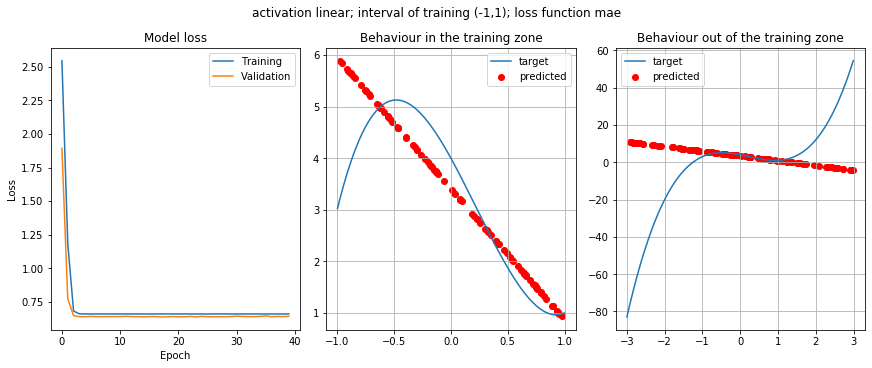

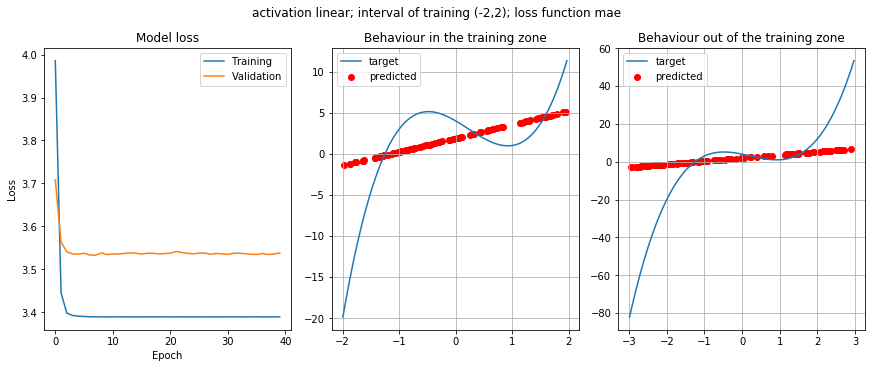

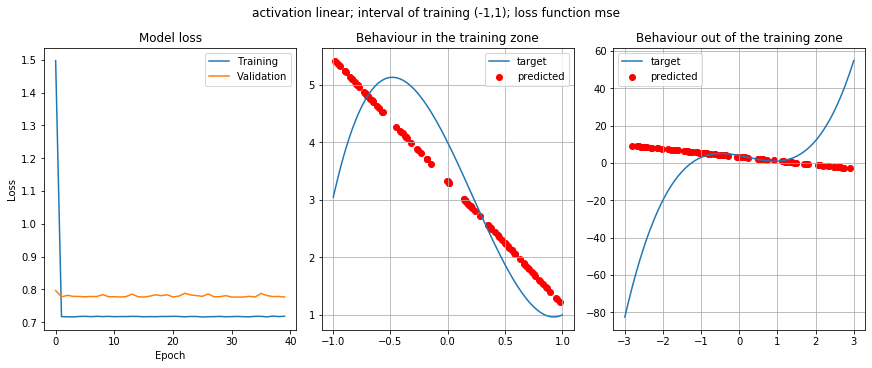

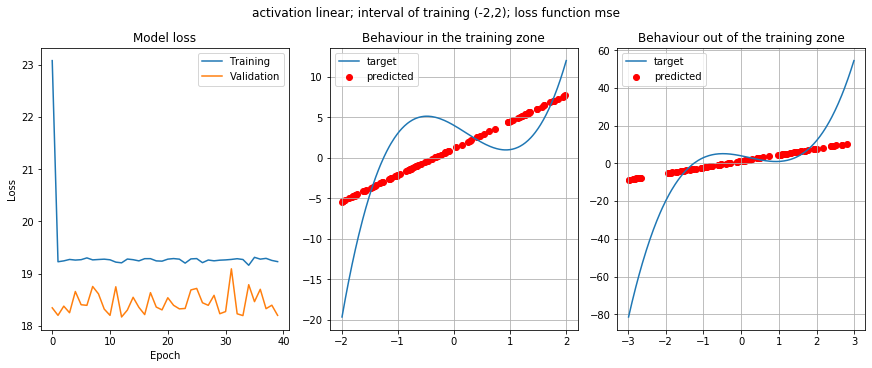

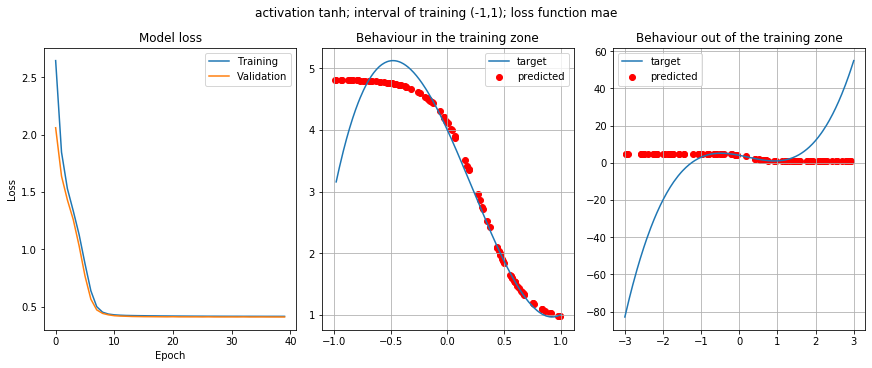

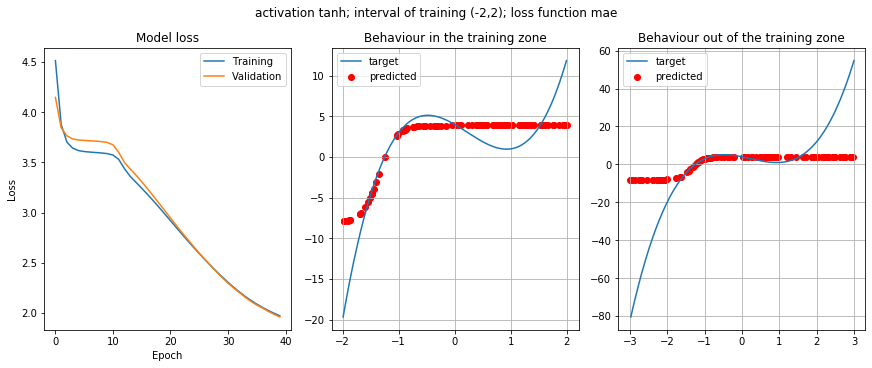

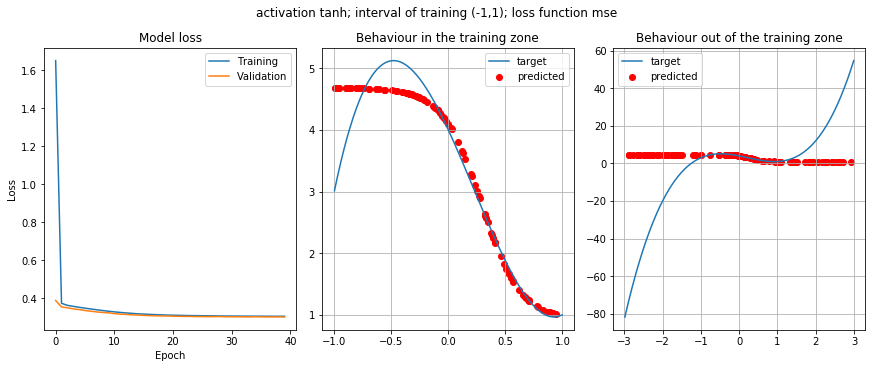

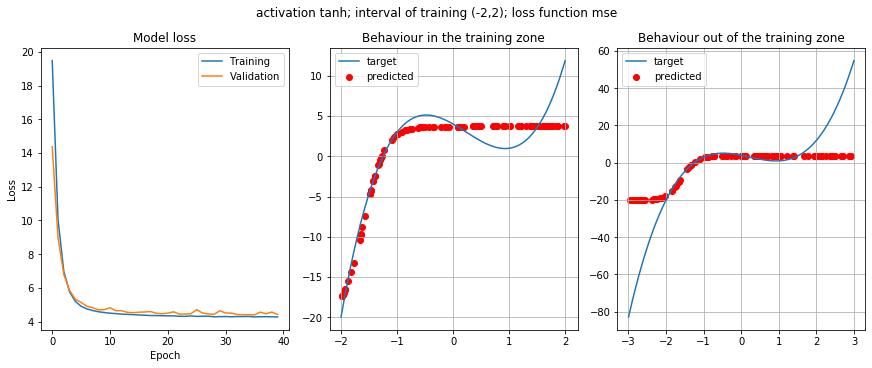

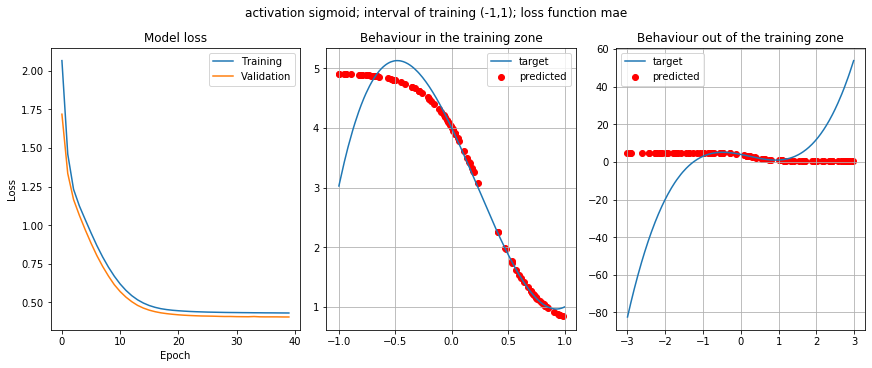

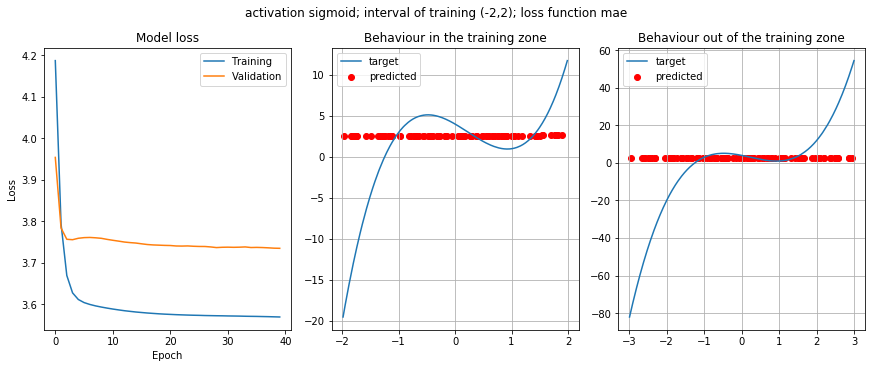

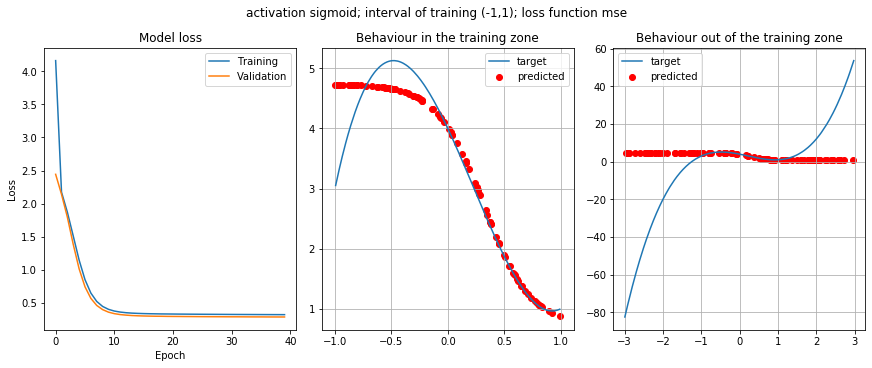

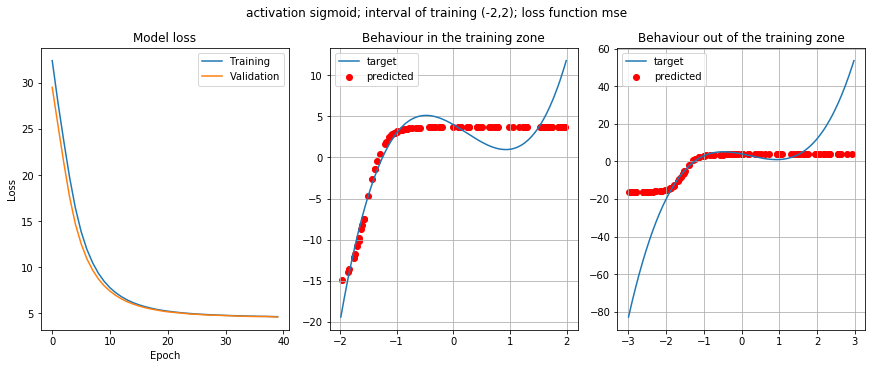

In [10]:
losses = ['mae', 'mse']
intervals = [[-1,1], [-2,2]]
activations = ['linear', 'tanh', 'sigmoid']


for activ in activations:
    for m_loss in losses:
            for  interv in intervals:

                # compose the NN model
                model = tf.keras.Sequential()
                model.add(Dense(1, input_shape=(1,), activation=activ))
                #model.add(Dense(4, activation = 'tanh'))
                model.add(Dense(1, activation='linear'))

                # compile
                model.compile(optimizer='sgd', loss=m_loss, metrics=[m_loss])
                #model.summary()

                # constructing training and validation data
                x_train = np.random.uniform(interv[0], interv[1], Ntrain)
                y_train = np.random.normal(f(x_train), sigma)
                x_valid = np.random.uniform(interv[0], interv[1], int(Ntrain/10))
                x_valid.sort()
                y_valid = np.random.normal(f(x_valid), sigma)
                y_target = f(x_valid) 
                x_target_out = np.random.uniform(-3,3, int(Ntrain/10))
                x_target_out.sort()
                y_target_out = f(x_target_out)

                # fit
                history = model.fit(x=x_train, y=y_train, 
                batch_size=32, epochs=Nepo,
                shuffle=True,
                validation_data=(x_valid, y_valid), verbose=0)

                # plot
                fig, axs = plt.subplots(1,3, figsize=(12,5), constrained_layout=True)
                title = "activation {0}; interval of training ({1},{2}); loss function {3}".format(activ, interv[0], interv[1], m_loss) 
                fig.suptitle(title)
                axs[0].plot(history.history['loss'], label='Training')
                axs[0].plot(history.history['val_loss'], label='Validation')
                axs[0].set_title('Model loss')
                axs[0].set_ylabel('Loss')
                axs[0].set_xlabel('Epoch')
                axs[0].legend( loc='best')

                x_predicted = np.random.uniform(interv[0], interv[1], 100)
                y_predicted = model.predict(x_predicted)
                axs[1].scatter(x_predicted, y_predicted,color='r', label='predicted')
                axs[1].plot(x_valid, y_target, label='target')
                axs[1].grid(True)
                axs[1].legend()
                axs[1].set_title('Behaviour in the training zone')

                x_predicted_out = np.random.uniform(-3, 3, 100)
                y_predicted_out = model.predict(x_predicted_out)
                axs[2].scatter(x_predicted_out, y_predicted_out ,color='r', label='predicted')
                axs[2].plot(x_target_out, y_target_out, label='target')
                axs[2].grid(True)
                axs[2].legend()
                axs[2].set_title('Behaviour out of the training zone')


                plt.show()


Si osserva che:
- Utilizzando la funzione di loss "mean absolute error" di solito si ha una convergenza più lenta rispetto al "mean squared error"
- Se lo strato interno ha attivazione lineare, l'unico fit che si può fare è lineare (ovvio)
- Sia con attivazione sigmoide che tanh, la rete riesce a individuare un punto dove la funzione "curva". Non riesce mai a riconoscerne due, pertanto i risultati hanno sempre la forma di tangente iperbolica. Nemmeno aumentare l'intervallo di training di modo che siano ben presenti le due "gobbe" della funzione cubica cambia la situazione



### Reti di dimensioni maggiori
#### 1 layer
Andiamo a incrementare il numero di neuroni, mantenendo sempre un solo layer. Utilizziamo attivazione tanh e loss mse.

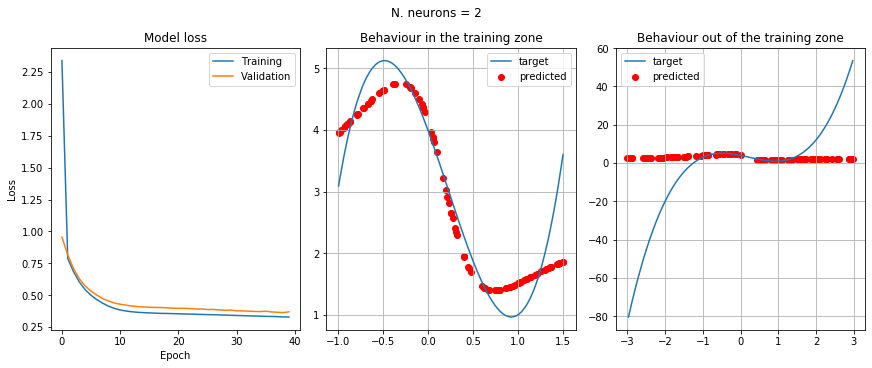

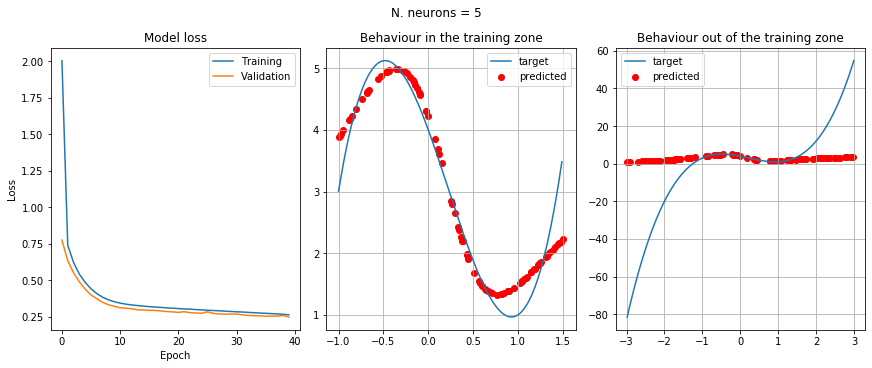

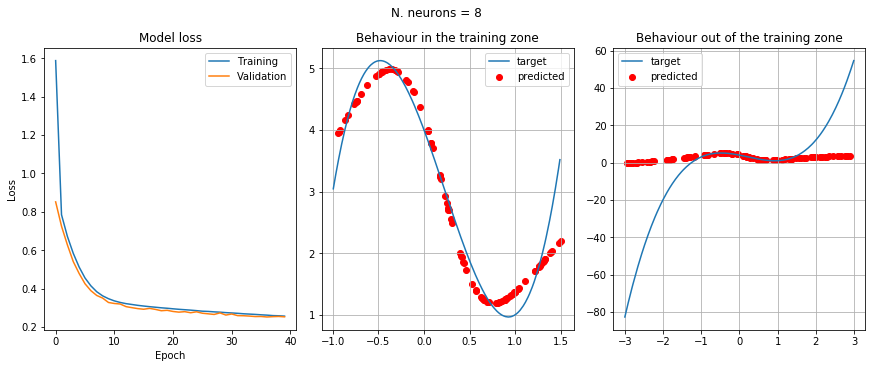

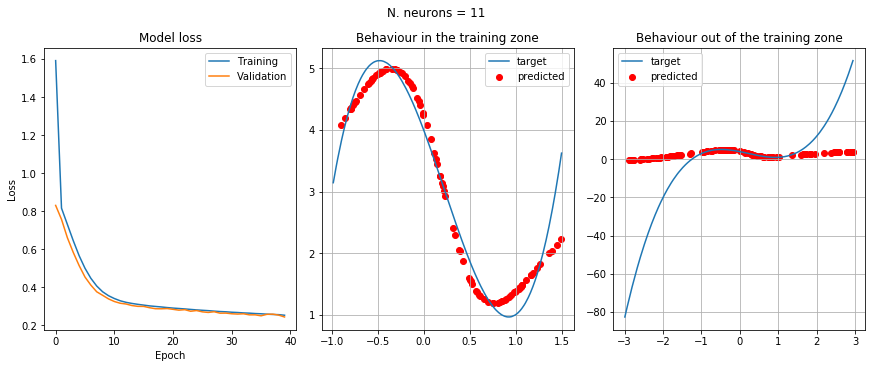

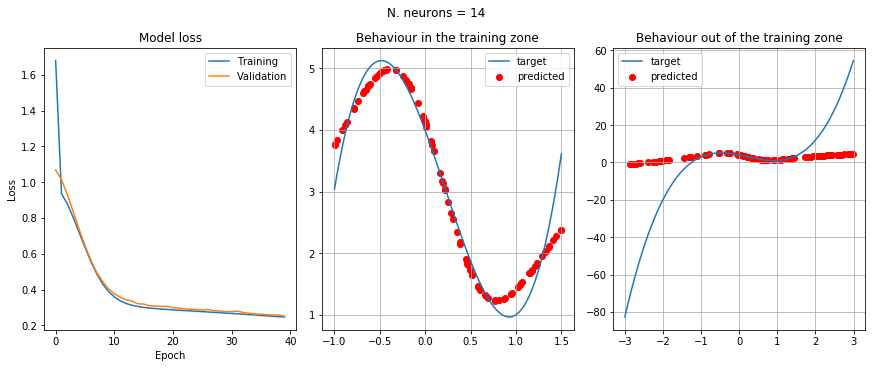

In [36]:
m_loss = 'mse'
interv = [-1,1.5]
activ = 'tanh'

for n_neurons in np.arange(2,15, 3):
    

    # compose the NN model
    model = tf.keras.Sequential()
    model.add(Dense(n_neurons, input_shape=(1,), activation=activ))
    #model.add(Dense(4, activation = 'tanh'))
    model.add(Dense(1, activation='linear'))

    # compile
    model.compile(optimizer='sgd', loss=m_loss, metrics=[m_loss])
    #model.summary()

    # constructing training and validation data
    x_train = np.random.uniform(interv[0], interv[1], Ntrain)
    y_train = np.random.normal(f(x_train), sigma)
    x_valid = np.random.uniform(interv[0], interv[1], int(Ntrain/10))
    x_valid.sort()
    y_valid = np.random.normal(f(x_valid), sigma)
    y_target = f(x_valid) 
    x_target_out = np.random.uniform(-3,3, int(Ntrain/10))
    x_target_out.sort()
    y_target_out = f(x_target_out)

    # fit
    history = model.fit(x=x_train, y=y_train, 
    batch_size=32, epochs=Nepo,
    shuffle=True,
    validation_data=(x_valid, y_valid), verbose=0)

    # plot
    fig, axs = plt.subplots(1,3, figsize=(12,5), constrained_layout=True)
    fig.suptitle('N. neurons = ' + str(n_neurons))
    axs[0].plot(history.history['loss'], label='Training')
    axs[0].plot(history.history['val_loss'], label='Validation')
    axs[0].set_title('Model loss')
    axs[0].set_ylabel('Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].legend( loc='best')

    x_predicted = np.random.uniform(interv[0], interv[1], 100)
    y_predicted = model.predict(x_predicted)
    axs[1].scatter(x_predicted, y_predicted,color='r', label='predicted')
    axs[1].plot(x_valid, y_target, label='target')
    axs[1].grid(True)
    axs[1].legend()
    axs[1].set_title('Behaviour in the training zone')

    x_predicted_out = np.random.uniform(-3, 3, 100)
    y_predicted_out = model.predict(x_predicted_out)
    axs[2].scatter(x_predicted_out, y_predicted_out ,color='r', label='predicted')
    axs[2].plot(x_target_out, y_target_out, label='target')
    axs[2].grid(True)
    axs[2].legend()
    axs[2].set_title('Behaviour out of the training zone')


    plt.show()


La rete migliora il suo comportamento rispetto alla rete con un neurone solo, si vede un netto miglioramento tra 2 e 5 neuroni. Oltre i 5 non si notano differenze. 

La rete ora riconosce il massimo e il minimo locale, ma anche ci sono varie zone fittate male. Il comportamento fuori dal dominio di allenamento, poi, è ben lontano dall'essere corretto.

### 2 layer
Due layer uguali con attivazione tanh, al variare della dimensione di questi

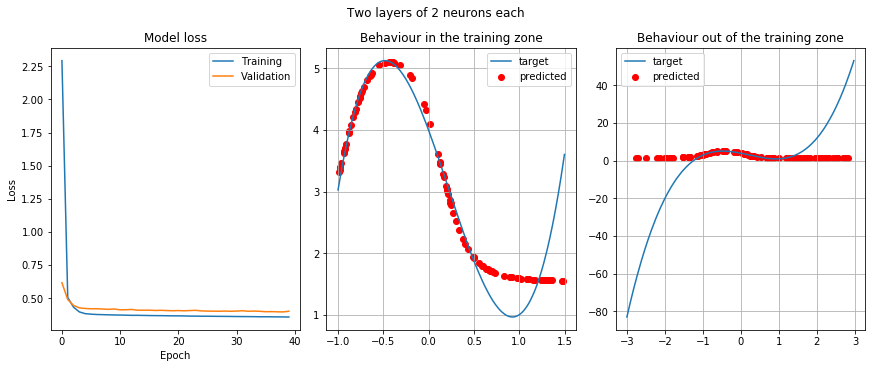

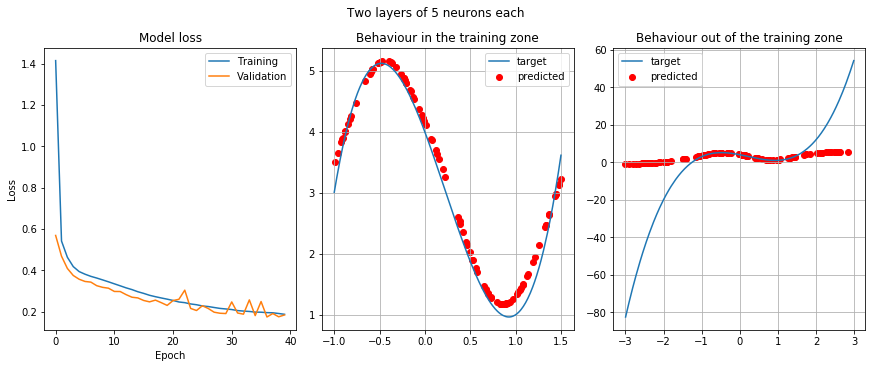

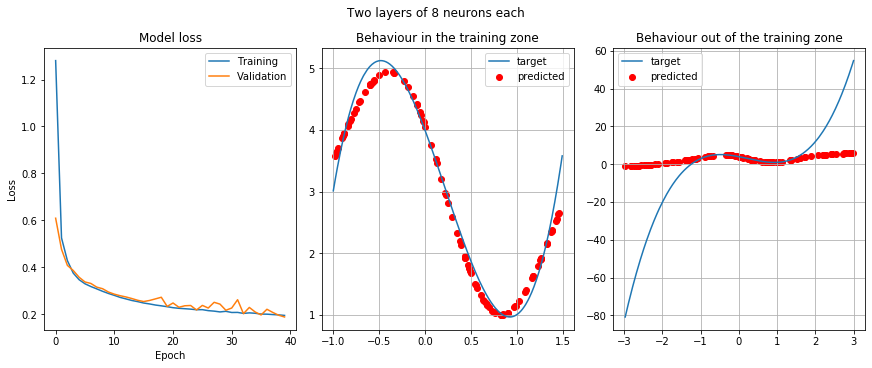

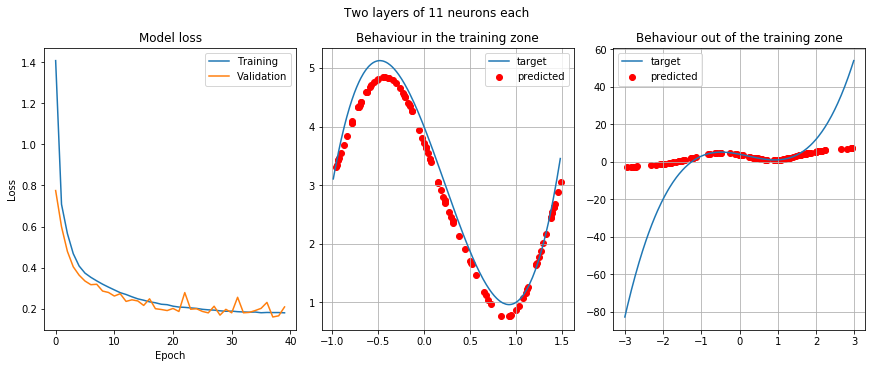

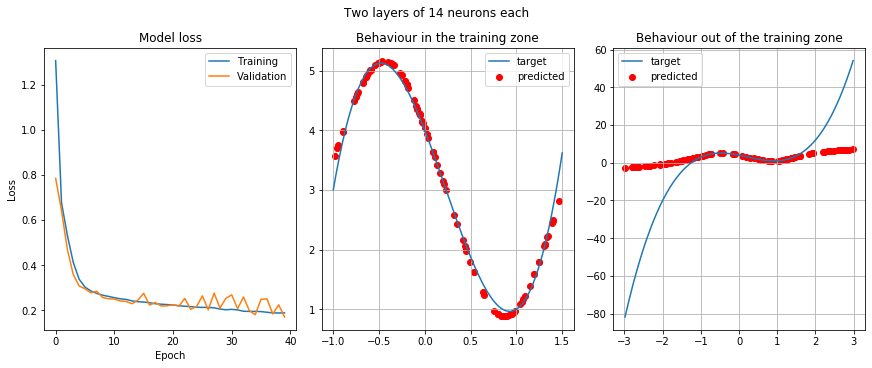

In [41]:
m_loss = 'mse'
interv = [-1,1.5]
activ = 'tanh'

for n_neurons in np.arange(2,15, 3):

    # compose the NN model
    model = tf.keras.Sequential()
    model.add(Dense(n_neurons, input_shape=(1,), activation=activ))
    model.add(Dense(n_neurons, activation=activ))
    model.add(Dense(1, activation='linear'))

    # compile
    model.compile(optimizer='sgd', loss=m_loss, metrics=[m_loss])
    #model.summary()

    # constructing training and validation data
    x_train = np.random.uniform(interv[0], interv[1], Ntrain)
    y_train = np.random.normal(f(x_train), sigma)
    x_valid = np.random.uniform(interv[0], interv[1], int(Ntrain/10))
    x_valid.sort()
    y_valid = np.random.normal(f(x_valid), sigma)
    y_target = f(x_valid) 
    x_target_out = np.random.uniform(-3,3, int(Ntrain/10))
    x_target_out.sort()
    y_target_out = f(x_target_out)

    # fit
    history = model.fit(x=x_train, y=y_train, 
    batch_size=32, epochs=Nepo,
    shuffle=True,
    validation_data=(x_valid, y_valid), verbose=0)

    # plot
    fig, axs = plt.subplots(1,3, figsize=(12,5), constrained_layout=True)
    fig.suptitle('Two layers of ' + str(n_neurons) + ' neurons each')
    axs[0].plot(history.history['loss'], label='Training')
    axs[0].plot(history.history['val_loss'], label='Validation')
    axs[0].set_title('Model loss')
    axs[0].set_ylabel('Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].legend( loc='best')

    x_predicted = np.random.uniform(interv[0], interv[1], 100)
    y_predicted = model.predict(x_predicted)
    axs[1].scatter(x_predicted, y_predicted,color='r', label='predicted')
    axs[1].plot(x_valid, y_target, label='target')
    axs[1].grid(True)
    axs[1].legend()
    axs[1].set_title('Behaviour in the training zone')

    x_predicted_out = np.random.uniform(-3, 3, 100)
    y_predicted_out = model.predict(x_predicted_out)
    axs[2].scatter(x_predicted_out, y_predicted_out ,color='r', label='predicted')
    axs[2].plot(x_target_out, y_target_out, label='target')
    axs[2].grid(True)
    axs[2].legend()
    axs[2].set_title('Behaviour out of the training zone')


    plt.show()


Con due strati si ha che all'aumentare nel numero di neuroni (per ciascuno strato) migliora il fit. A 14 neuroni per strato si ha una buona coincidenza tra valori predetti e attesi

### 3 layers
Proviamo ora a costruire una rete più complessa con 3 layer interni con attivazioni: relu, tanh, tanh. Diverse reti sono studiate al variare della dimensione degli strati interni. Si è introdotto uno strato relu per avere funzione di attivazione che non 

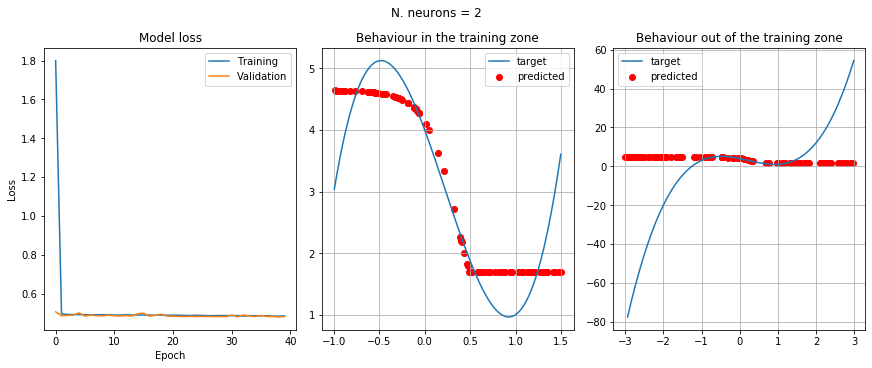

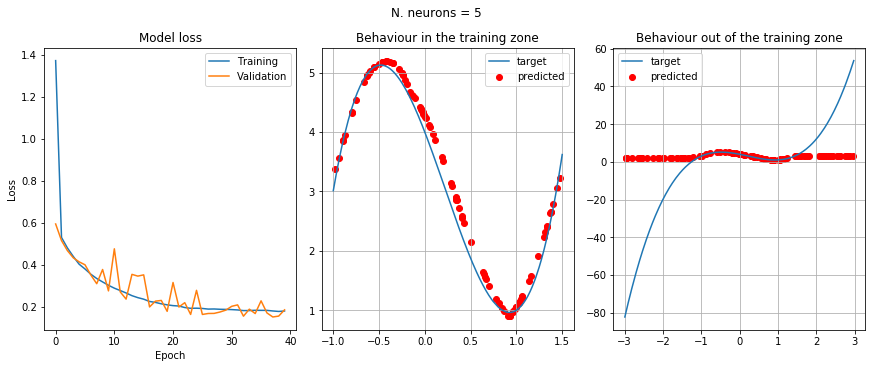

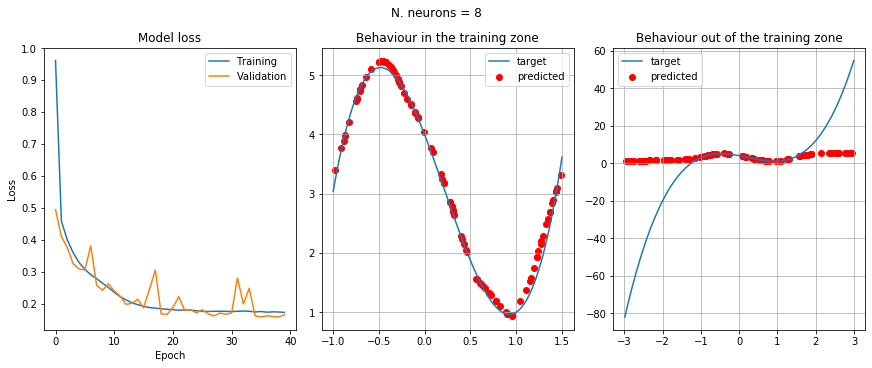

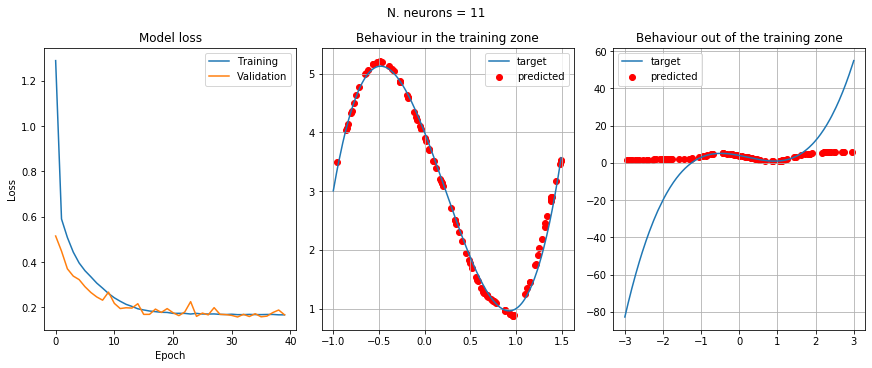

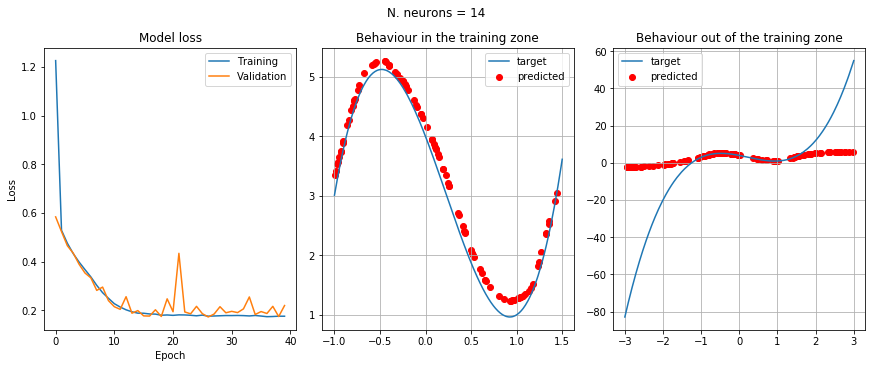

In [5]:
m_loss = 'mse'
interv = [-1,1.5]

for n_neurons in np.arange(2,15, 3):

    # compose the NN model
    model = tf.keras.Sequential()
    model.add(Dense(n_neurons, input_shape=(1,), activation='relu'))
    model.add(Dense(n_neurons, activation='tanh'))
    model.add(Dense(n_neurons, activation='tanh'))

    model.add(Dense(1, activation='linear'))

    # compile
    model.compile(optimizer='sgd', loss=m_loss, metrics=[m_loss])
    #model.summary()

    # constructing training and validation data
    x_train = np.random.uniform(interv[0], interv[1], Ntrain)
    y_train = np.random.normal(f(x_train), sigma)
    x_valid = np.random.uniform(interv[0], interv[1], int(Ntrain/10))
    x_valid.sort()
    y_valid = np.random.normal(f(x_valid), sigma)
    y_target = f(x_valid) 
    x_target_out = np.random.uniform(-3,3, int(Ntrain/10))
    x_target_out.sort()
    y_target_out = f(x_target_out)

    # fit
    history = model.fit(x=x_train, y=y_train, 
    batch_size=32, epochs=Nepo,
    shuffle=True,
    validation_data=(x_valid, y_valid), verbose=0)

    # plot
    fig, axs = plt.subplots(1,3, figsize=(12,5), constrained_layout=True)
    fig.suptitle('N. neurons = ' + str(n_neurons))
    axs[0].plot(history.history['loss'], label='Training')
    axs[0].plot(history.history['val_loss'], label='Validation')
    axs[0].set_title('Model loss')
    axs[0].set_ylabel('Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].legend( loc='best')

    x_predicted = np.random.uniform(interv[0], interv[1], 100)
    y_predicted = model.predict(x_predicted)
    axs[1].scatter(x_predicted, y_predicted,color='r', label='predicted')
    axs[1].plot(x_valid, y_target, label='target')
    axs[1].grid(True)
    axs[1].legend()
    axs[1].set_title('Behaviour in the training zone')

    x_predicted_out = np.random.uniform(-3, 3, 100)
    y_predicted_out = model.predict(x_predicted_out)
    axs[2].scatter(x_predicted_out, y_predicted_out ,color='r', label='predicted')
    axs[2].plot(x_target_out, y_target_out, label='target')
    axs[2].grid(True)
    axs[2].legend()
    axs[2].set_title('Behaviour out of the training zone')


    plt.show()


In generale, migliora la precisione all'aumentare dei neuroni per strato.